In [98]:
hello_rules = '''
say_hello = names hello tail
names = name names | name
name = Jhon | Mike | 老梁 | 老刘
hello = 你好 | 您来了 | 快请进
tail = 呀 | !
'''

In [19]:
'add = number + number'

'add = number + number'

In [88]:
def get_generation_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):
    
    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line: continue 
    #     skip the epty line

        stmt, expr = line.split(stmt_split)

        print(stmt, expr.split(or_split))

        rules[stmt.strip()] = expr.split(or_split)
    generated = generate(rules, target=target)
    
    return generated

In [67]:
rules['name']

[' Jhon ', ' Mike ', ' 老梁 ', ' 老刘']

In [68]:
rules

{'say_hello ': [' names hello tail'],
 'names ': [' name names | name'],
 'name ': [' Jhon | Mike | 老梁 | 老刘'],
 'hello ': [' 你好 | 您老啦 | 快请进'],
 'tail ': [' 呀 | !'],
 'say_hello': [' names hello tail'],
 'names': [' name names ', ' name'],
 'name': [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘'],
 'hello': [' 你好 ', ' 您老啦 ', ' 快请进'],
 'tail': [' 呀 ', ' !']}

In [96]:
def generate(grammar_rule,target):
    if target in grammar_rule:   #names
        candidates = grammar_rule[target]   #['name names', 'name']
        candidate = random.choice(candidates)   #'name names', 'name'
        return ''.join(generate(grammar_rule,target=c.strip())for c in candidate.split())
    else:
        return target

In [97]:
generate(rules, target='say_hello')

'Mike您老啦呀'

In [91]:
get_generation_by_gram(hello_rules, target='say_hello')

say_hello  [' names hello tail']
names  [' name names ', ' name']
name  [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘']
hello  [' 你好 ', ' 您老啦 ', ' 快请进']
tail  [' 呀 ', ' !']


'Mike 快请进 呀'

In [94]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的"""

In [99]:
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

sentence  [' noun_phrase verb_phrase']
noun_phrase  [' Article Adj* noun']
Adj*  [' Adj ', ' Adj Adj*']
verb_phrase  [' verb noun_phrase']
Article  ['  一个 ', ' 这个']
noun  ['   女人 ', '  篮球 ', ' 桌子 ', ' 小猫']
verb  [' 看着   ', '  坐在 ', '  听着 ', ' 看见']
Adj  ['   蓝色的 ', '  好看的 ', ' 小小的']


'这个蓝色的女人看见一个蓝色的蓝色的好看的好看的篮球'

In [105]:
simple_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op vale
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''

In [121]:
for i in range(20):
    print(get_generation_by_gram(simple_programming, target='if_stmt', stmt_split='=>'))

if_stmt  [' if ( cond ) { stmt }']
cond  [' var op vale']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char']
char  [' a ', ' b ', '  c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']
if(d2>=vale){if(1avale){d=dc2}}
if_stmt  [' if ( cond ) { stmt }']
cond  [' var op vale']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char']
char  [' a ', ' b ', '  c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']
if(0vale){if(03a<vale){c=3}}
if_stmt  [' if ( cond ) { stmt }']
cond  [' var op vale']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char']
char  [' a ', ' b ', '  c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']
if(0<=vale){0b=c101}
if_stmt  [' if ( cond ) { stmt }']
cond  [' var op vale']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char

In [13]:
import random

In [4]:
def name():
    return random.choice('Jhon | Mike | 老梁'.split('|'))

In [6]:
def hello():
    return random.choice('你好 | 您老啦 | 快请进'.split('|'))

In [11]:
def say_hello():
    return name() + ' ' + hello()

In [17]:
say_hello()

'Jhon   您老啦 '

## Language model

## input: Sentence(W1..Wn)
## output: Probability(0 - 1)

$$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_i)}$$

In [5]:
corpus = 'C:/Users/86186/Desktop/NLP STUDY/article_9k.txt'

In [8]:
FILE = open(corpus, encoding='utf-8').read()
len(FILE)

33425826

In [9]:
FILE[:100]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MI'

In [11]:
def generate_by_pro(text_corpus, length=20):
    return ''.join(random.sample(text_corpus, length))

In [14]:
generate_by_pro(FILE)

'年大来午还联n不言汽明任贴发再其2乃进馆'

In [16]:
FILE[:500]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄'

In [17]:
import jieba

In [18]:
max_length = 1000000
sub_file = FILE[:max_length]

In [19]:
def cut(string):
    return list(jieba.cut(string))

In [20]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86186\AppData\Local\Temp\jieba.cache
Loading model cost 1.967 seconds.
Prefix dict has been built succesfully.


In [36]:
TOKENS[:100]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '\n',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小']

In [22]:
len(TOKENS)

532454

In [27]:
from collections import Counter

In [25]:
%matplotlib inline

In [28]:
words_count = Counter(TOKENS)

In [37]:
words_count.most_common(100)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960),
 ('年', 1959),
 ('对', 1795),
 ('都', 1720),
 ('中', 1699),
 ('为', 1686),
 ('日', 1674),
 ('等', 1655),
 ('与', 1601),
 ('中国', 1597),
 ('上', 1583),
 ('不', 1566),
 ('就', 1530),
 ('被', 1484),
 ('6', 1454),
 ('我', 1425),
 ('到', 1385),
 ('这', 1330),
 ('人', 1321),
 ('但', 1296),
 ('\n', 1196),
 ('后', 1186),
 ('一个', 1173),
 ('从', 1120),
 ('还', 1117),
 ('并', 1103),
 ('说', 1065),
 ('而', 1027),
 ('市场', 1018),
 ('会', 1001),
 ('我们', 981),
 ('没有', 981),
 ('表示', 934),
 ('让', 878),
 ('自己', 831),
 ('进行', 818),
 ('要', 817),
 ('已经', 808),
 ('记者', 794),
 ('时', 774),
 ('可以', 773),
 ('个', 761),
 ('他们', 759),
 ('以', 752),
 ('公司', 730),
 ('下', 723),
 ('更', 699),
 ('发展', 694),
 ('5', 670),
 ('她', 652),
 ('美国', 651),
 ('其', 649),
 ('可能', 648),
 ('多', 646),
 ('你', 640),
 ('这个', 636),
 ('着', 631),
 ('目前', 611),
 ('就是', 611),
 ('能', 594),
 ('通过', 591),
 ('企业', 572),
 ('给', 567),
 (

In [29]:
words_with_fre = [f for w, f in words_count.most_common()]

In [30]:
import matplotlib.pyplot as plt

In [34]:
words_count.most_common(10)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960)]

In [32]:
words_with_fre[:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

In [38]:
import numpy as np

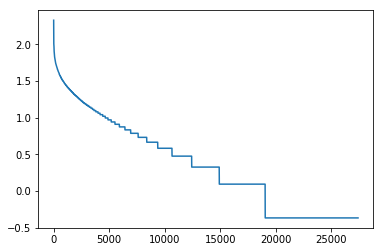

In [40]:
plt.plot(np.log(np.log(words_with_fre)))

In [21]:
list(jieba.cut('一加手机5要做市面最轻薄'))

['一加', '手机', '5', '要', '做', '市面', '最', '轻薄']

In [46]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [45]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [48]:
_2_gram_word_counts = Counter(_2_gram_words)

$$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_{i+1})}$$

In [57]:
words_count.most_common()[-1][-1]

1

In [58]:
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [59]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [60]:
def get_gram_count(word, wc):
    if word in wc: return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [63]:
get_gram_count('xxx',words_count)

1

In [64]:
get_gram_count('xxx', _2_gram_word_counts)

1

In [65]:
def two_gram_model(sentence):
    tokens = cut(sentence)
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        probability *= pro 
        
    return probability
        

In [66]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

3.0550026391456175e-26

In [73]:
two_gram_model('我请你吃饭饭')

8.702311333890282e-08

In [67]:
two_gram_model('前天早上吃晚饭的时候')

7.429922323539344e-07

In [69]:
two_gram_model('我请你吃粤菜')

5.710891812865497e-08

In [70]:
two_gram_model('这个人来自卡迪夫大学')

2.751306280917804e-07

In [71]:
two_gram_model('我想吃饭')

0.005625879043600563

In [72]:
two_gram_model('这个花特别好看')

1.7475796022508822e-05